## Research question: What risk factors are most predictive of diabetes risk?

By IMBA students, Year 2 - Manole Daniela, Yasmin Khader, Carmen Grigoras

## Table of Contents

- Basic understanding of the data: Dataset columns, shape, types of data
- Historgrams for each feature (distribution of values in the dataframe)
- Violin plots (Correlation between the distribution of a feature and if the patient has diabetes)
- Correlation Matrix (Heatmap)
- Train CatBoost model (Gradient Boosted Decision Trees) and determine feature importance (SHAP values)

### Independent Variables (Target Feature):

- Diabetes_binary: No=0, Diabetes=1

### Other Features:

- HighBP: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> Yes=1, No=0

- HighChol: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> Yes=1, No=0

- CholCheck: Cholesterol check within past five years --> Yes=1, No=0

- BMI: Body Mass Index (BMI) --> BMI value

- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> Yes=1, No=0

- Stroke: (Ever told) you had a stroke. --> Yes=1, No=0

- HeartDiseaseorAttack: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> Yes=1, No=0

- PhyActiviity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> Yes=1, No=0

- Fruits: Consume Fruit 1 or more times per day --> Yes=1, No=0

- Veggies: Consume Vegetables 1 or more times per day --> Yes=1, No=0

- HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> Yes=1, No=0

- AnyHealthcare: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> Yes=1, No=0

- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> Yes=1, No=0

- GenHlth: Would you say that in general your health is: --> Ordinal feature: 1=Excellent - 5=Poor

- MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> Ordinal=number of days

- PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> Ordinal=number of days

- DiffWalk: Do you have serious difficulty walking or climbing stairs? --> Yes=1, No=0

- Sex: Indicate sex of respondent. --> Female=0, Male=1

- Age: Age category --> Ordinal: age 18-24=1, all the way up to 13, which is 80 and older. 5 year increments.

- Education: What is the highest grade or year of school you completed? --> Ordinal: 1 being never attended school or kindergarten only up to 6 being college 4 years or more

- Income: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> Ordinal: 1 being less than 10,000 all the way up to 8 being 75,000 or more

In [1]:
# Preparing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Basic understanding of the data

We have a Dataset of 22 columns (21 features + target feature) and 70692 rows (patients).

In [2]:
# Importing and visualising the contents of the Dataset
data = pd.read_csv("./diabetes_5050.csv")
print(data.shape)
data.head()

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### The dataset is clean with 0 missing values. 
### All the features are numeric and data types are float.

In [3]:
# Check for data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
data['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

#### The dataset has an equal percent of patients with diabetes and patients without diabetes.

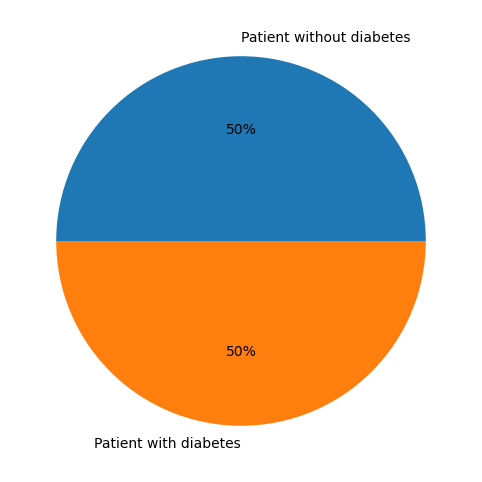

In [5]:
# Check the dataset of how many patients have diabetes
patients_diabetes = {
    0: sum(data["Diabetes_binary"].apply(lambda x: 1 if x == 0 else 0)),
    1: sum(data["Diabetes_binary"].apply(lambda x: 1 if x == 1 else 0)),
}
plt.figure(figsize=(8, 6))
plt.pie(x=patients_diabetes.values(), labels=['Patient without diabetes', 'Patient with diabetes'], autopct='%.0f%%')
plt.show()

## Histograms and Violin Plots
In order to better visualize the data we have at our disposal, we decided to use two types of plots: 
- a histogram, which will show us the distribution of values on the respective column in the dataframe
- a violin plot, which will give us important insights on whether the data influences the outcome in a visible way.

### Defining a plotting function to use it for histograms and violin plots

In [6]:
def plot_function(dataframe, feature_to_plot, type_of_plot):
    plt.figure(figsize=(8, 6))
    if type_of_plot=='violinplot':
        sns.violinplot(data=dataframe,
                       x='Diabetes_binary',
                       y=feature_to_plot,
                       palette="Spectral").set_xticklabels(['Patient without diabetes', 'Patient with diabetes'])
        plt.title(f'{feature_to_plot} vs Outcome')
        plt.show()
    elif type_of_plot=='histogram':
        sns.histplot(data=dataframe, 
                     x=feature_to_plot,
                     color='#e4b634',
                     kde=True)
        plt.title(f'{feature_to_plot} Histogram')
        plt.show()
    else:
        print("Wrong type of plot")
    return None

### Feature Histogram and Violinplot

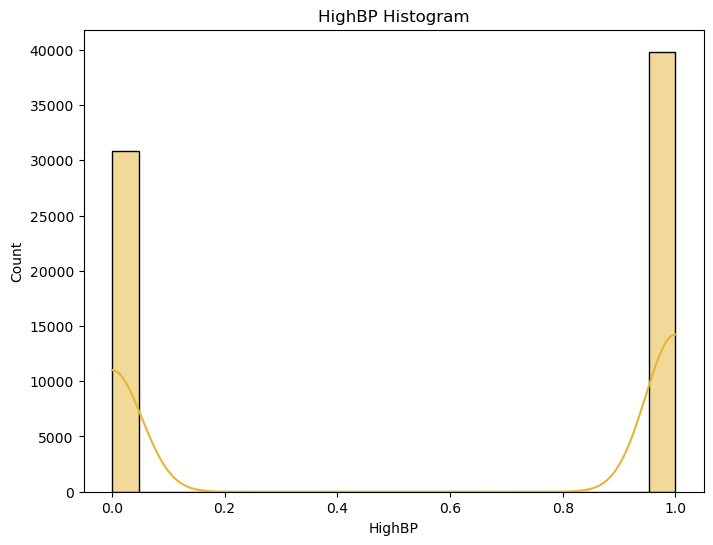

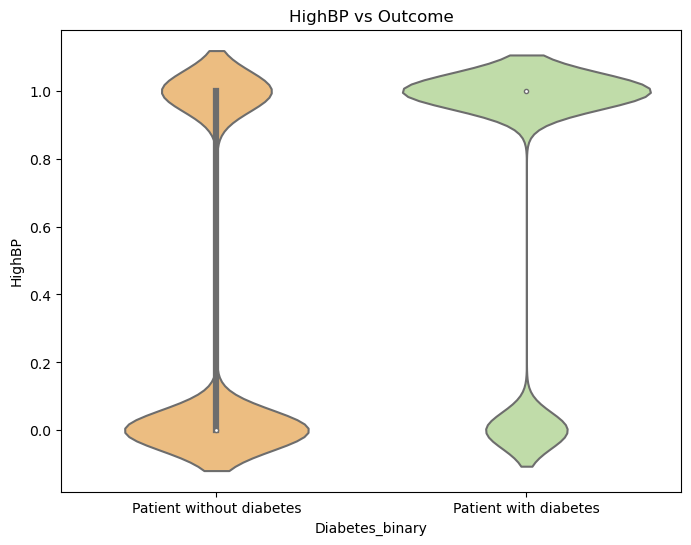

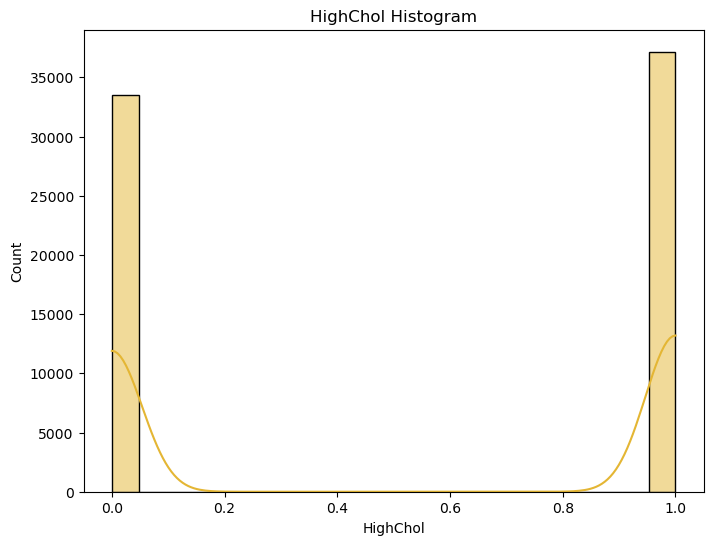

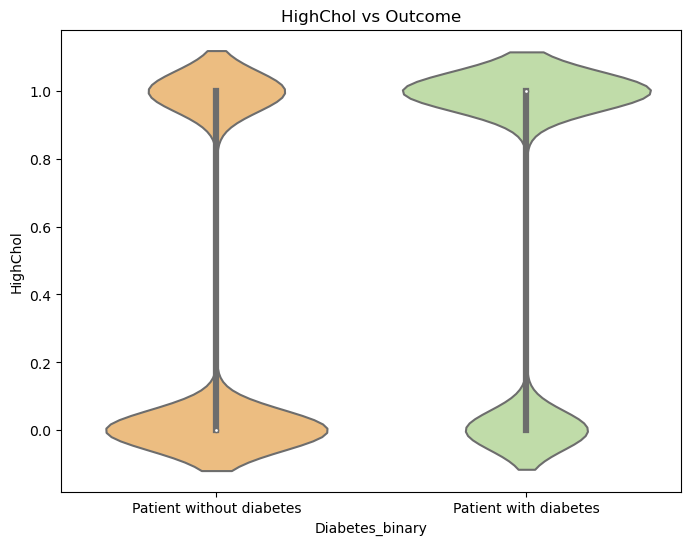

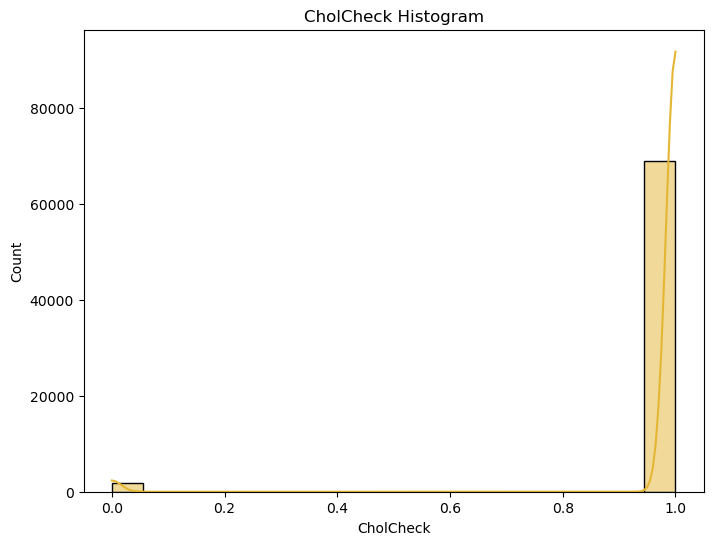

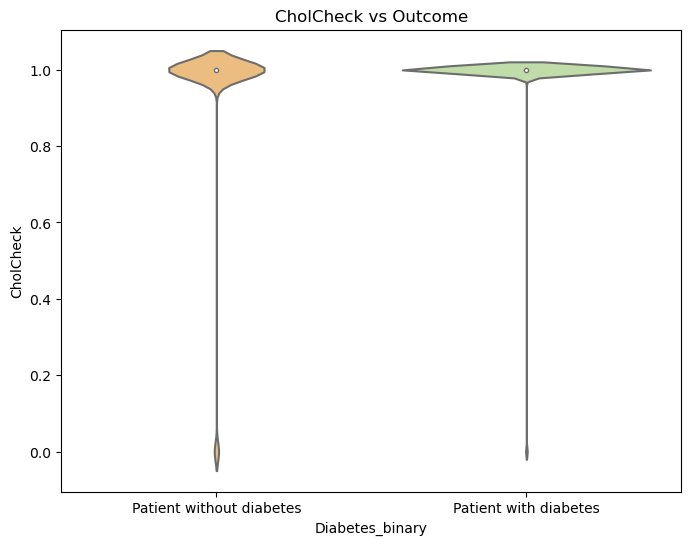

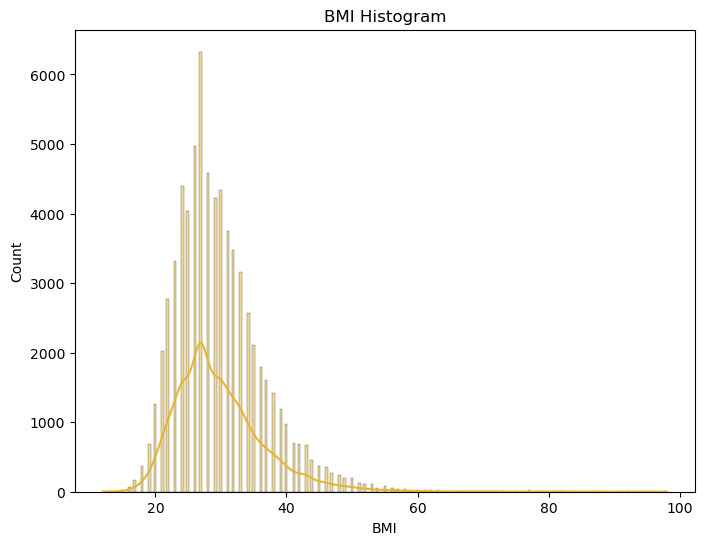

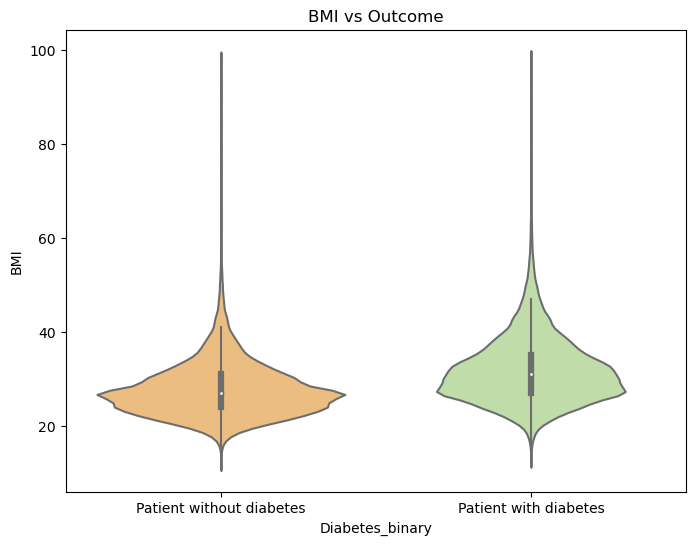

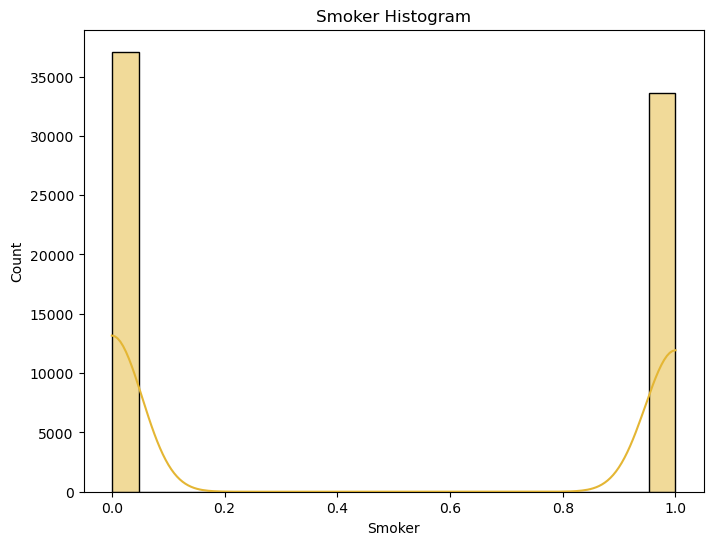

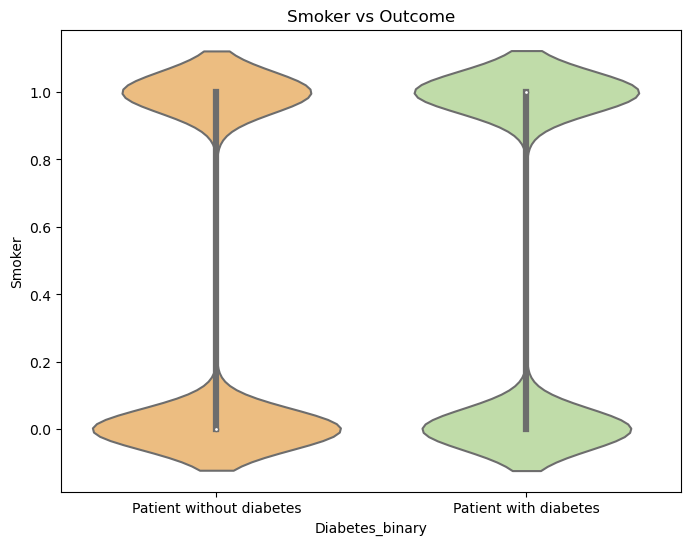

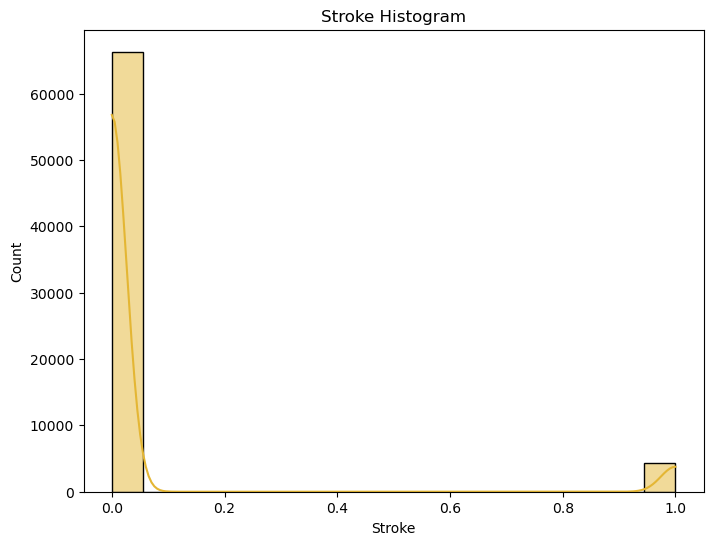

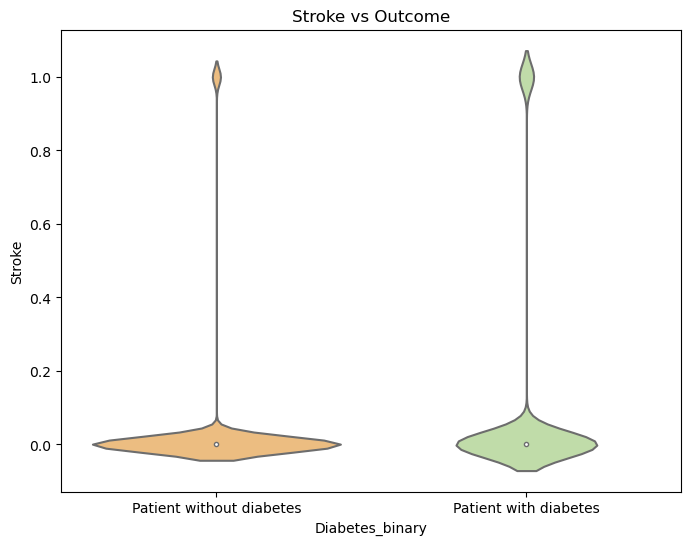

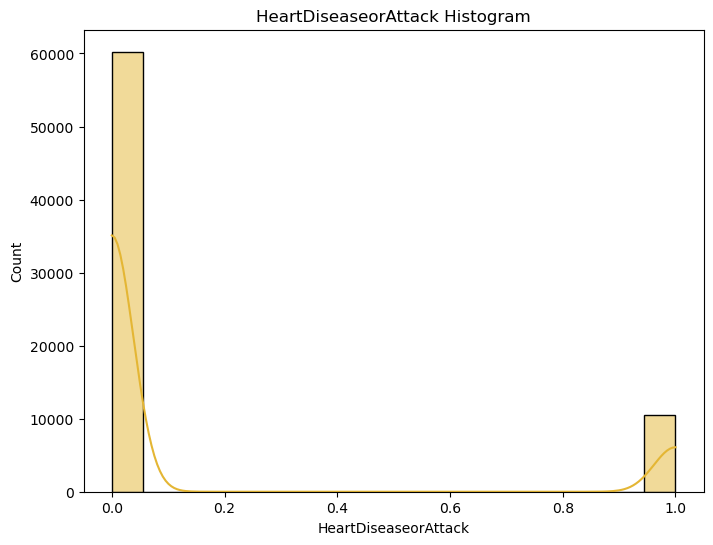

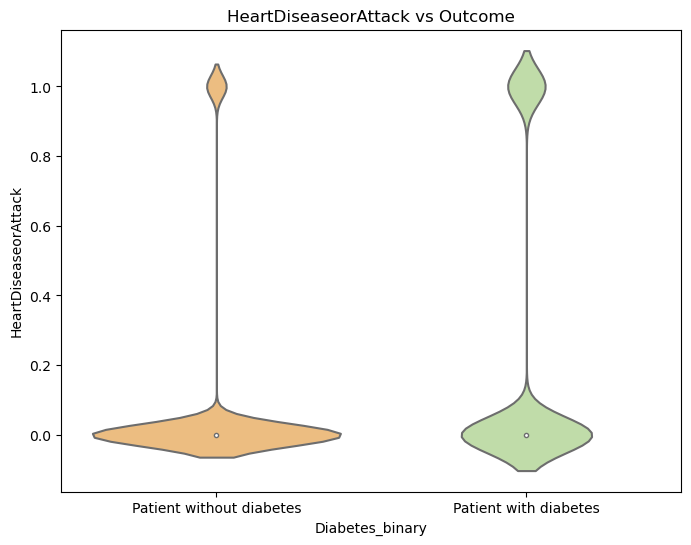

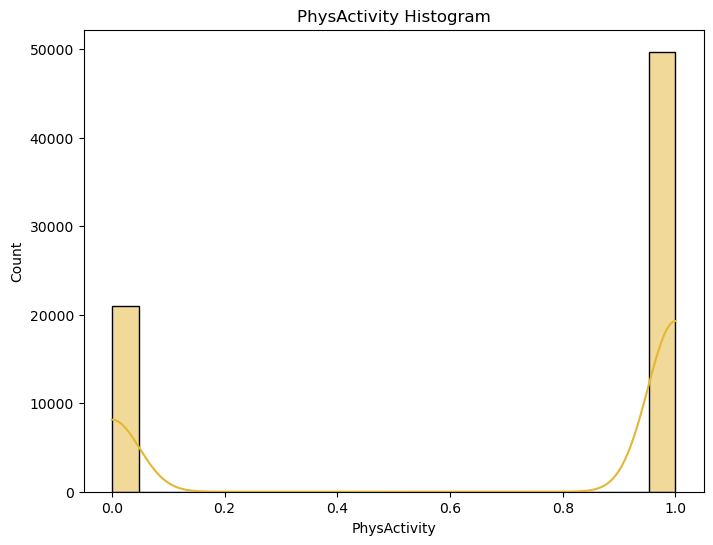

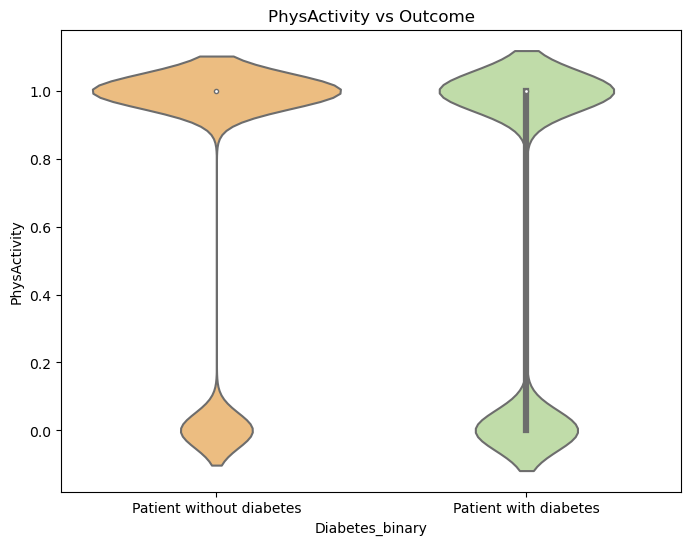

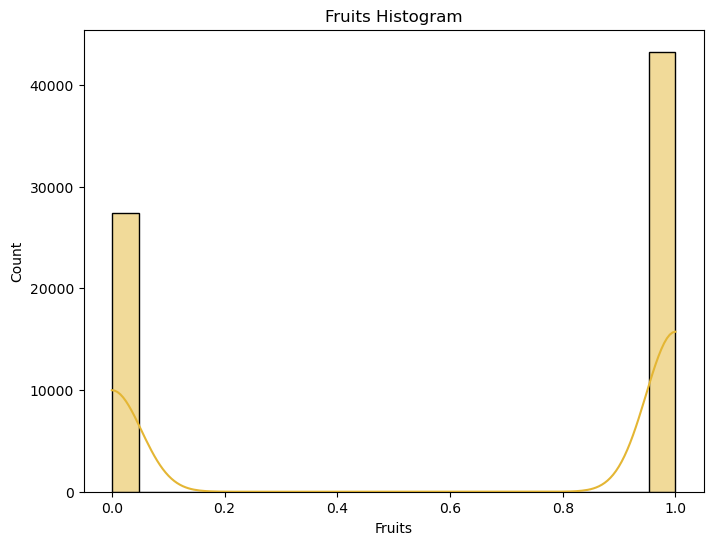

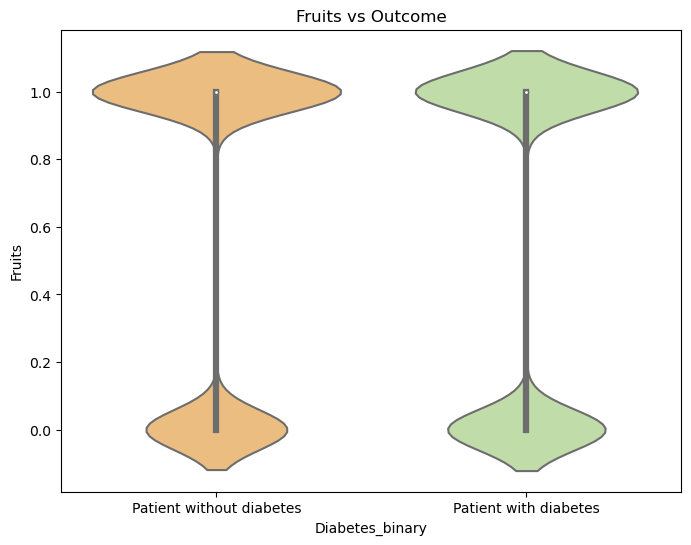

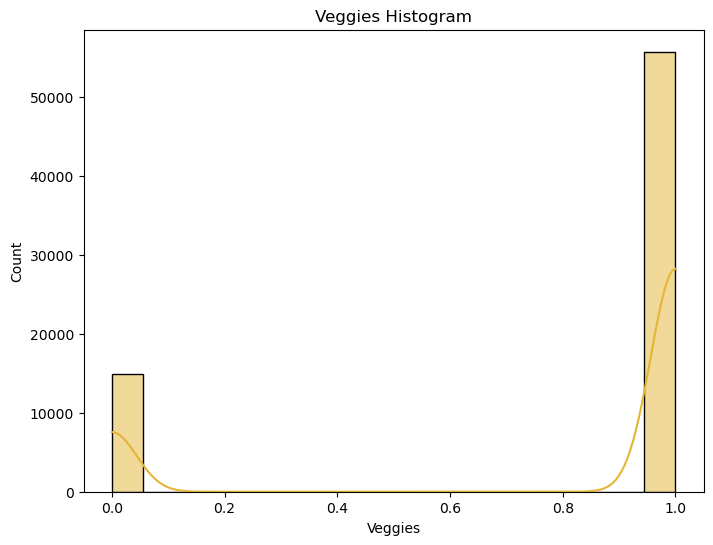

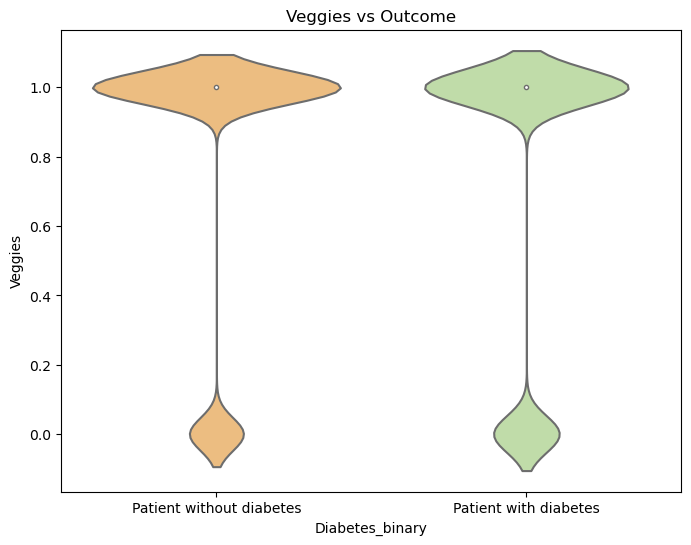

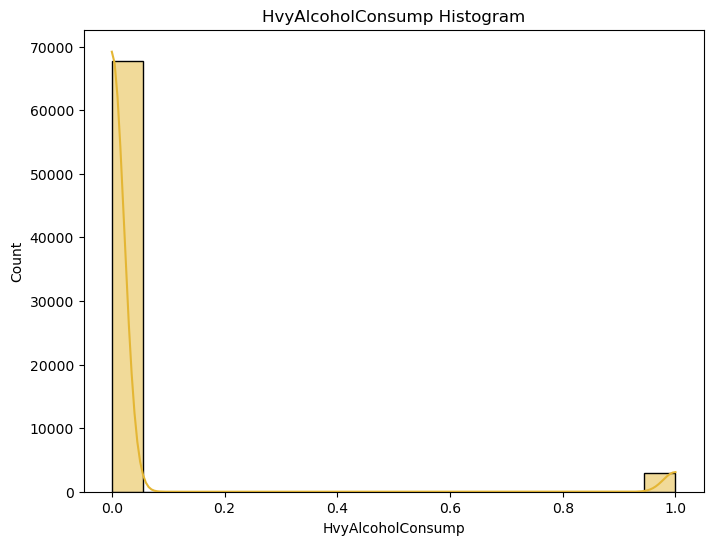

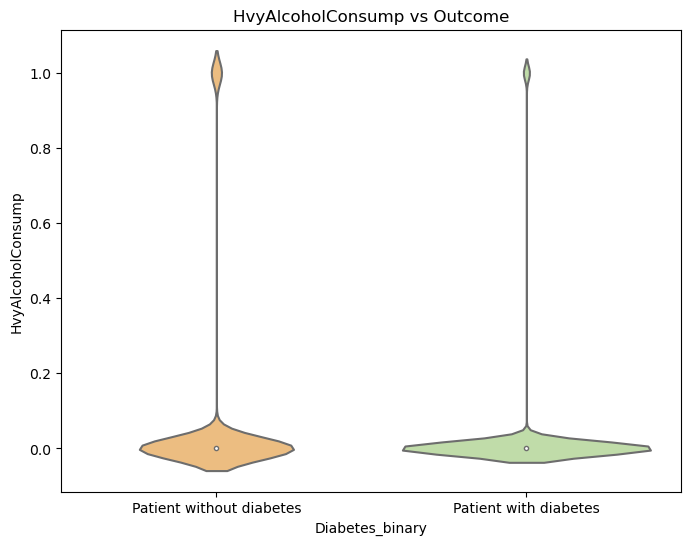

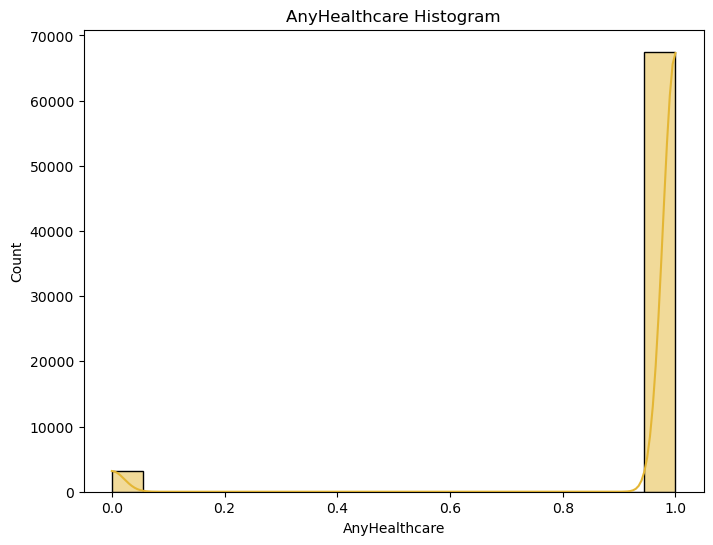

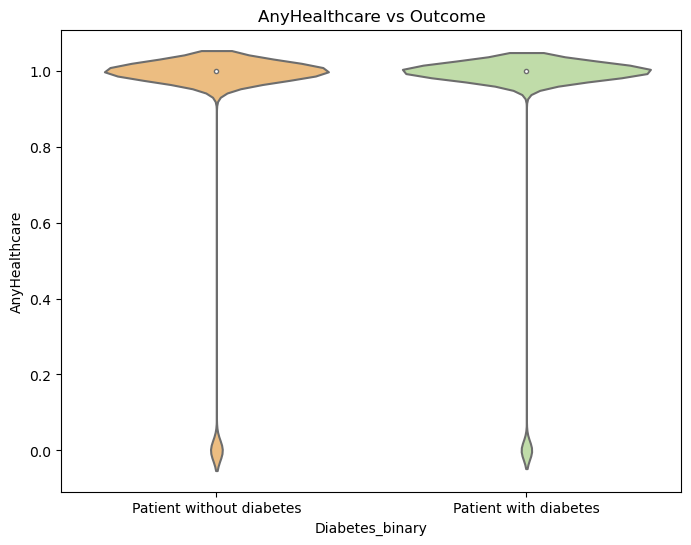

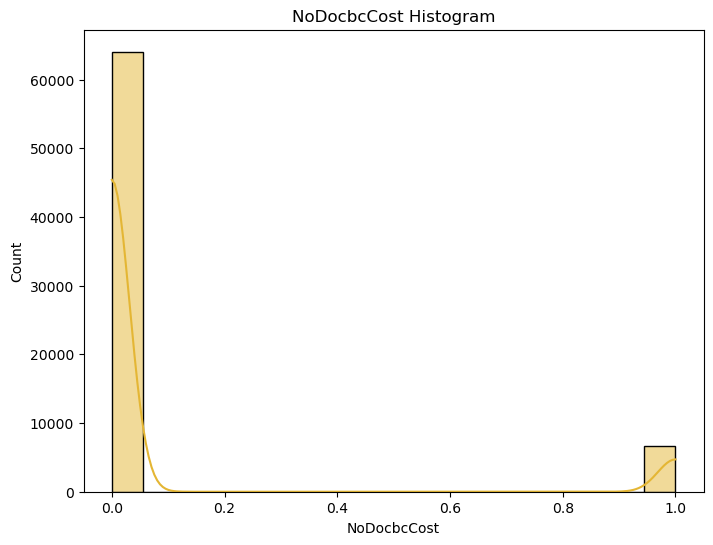

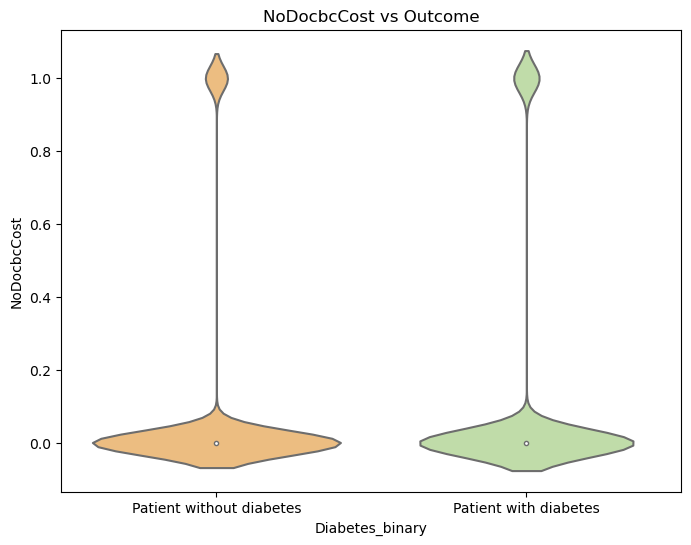

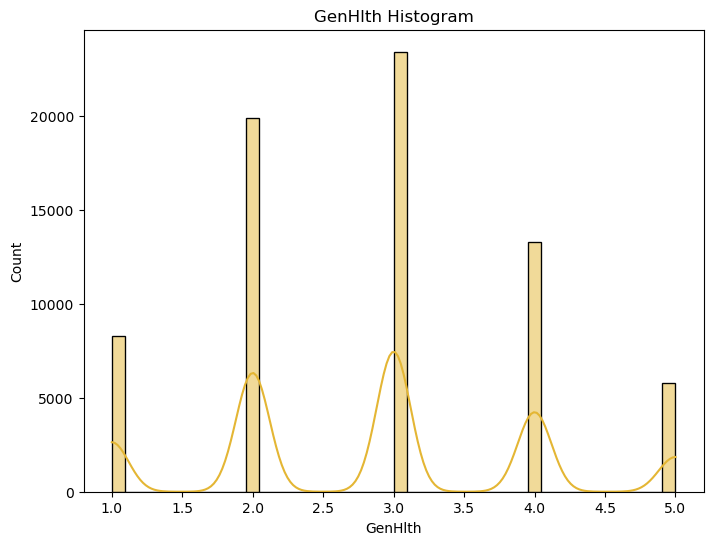

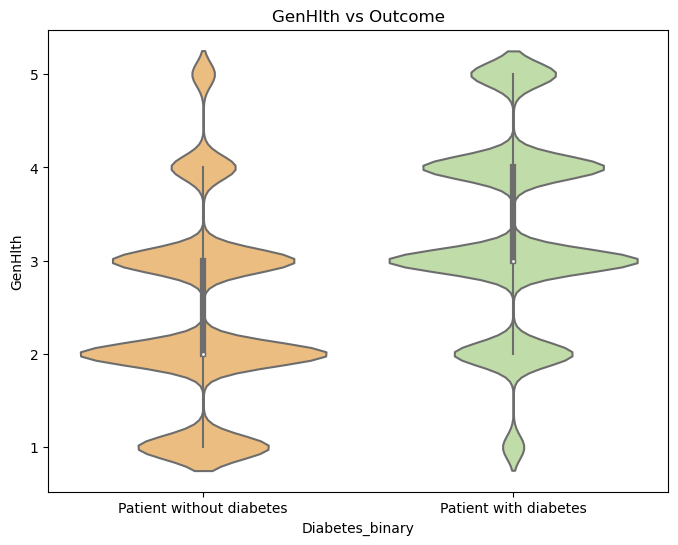

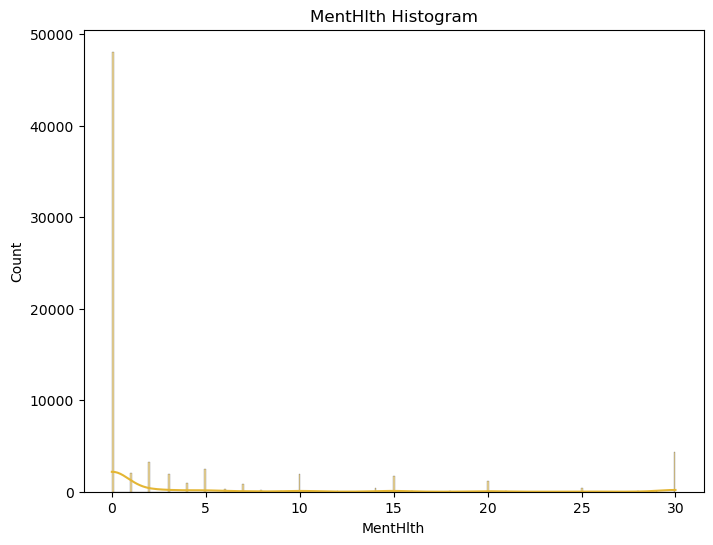

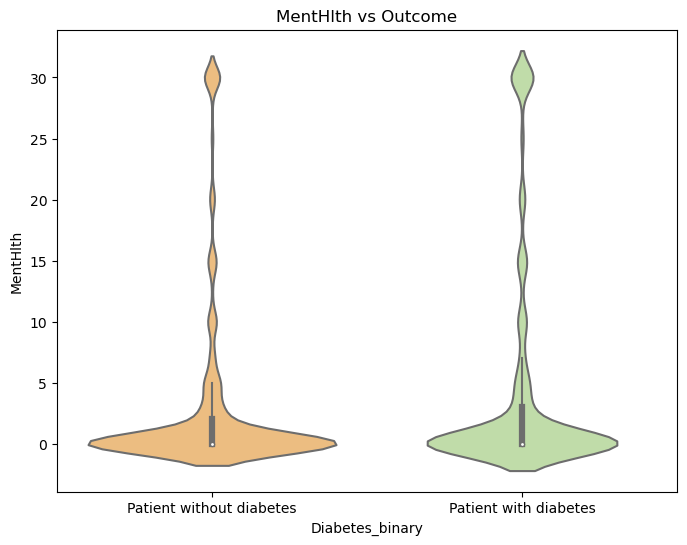

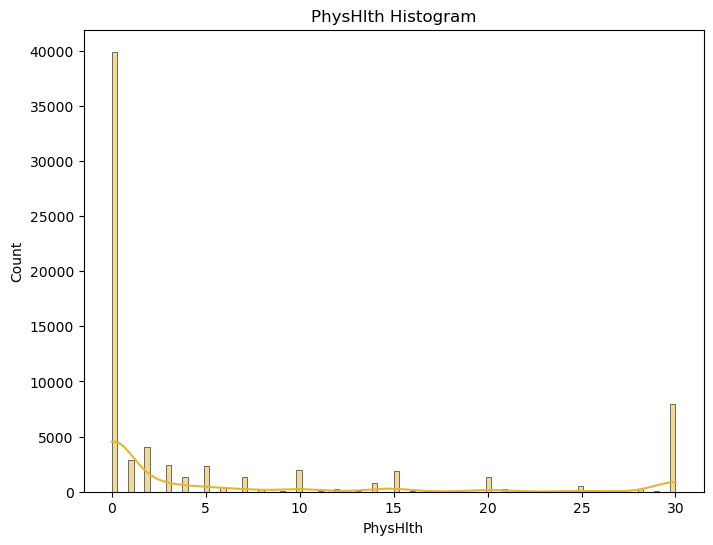

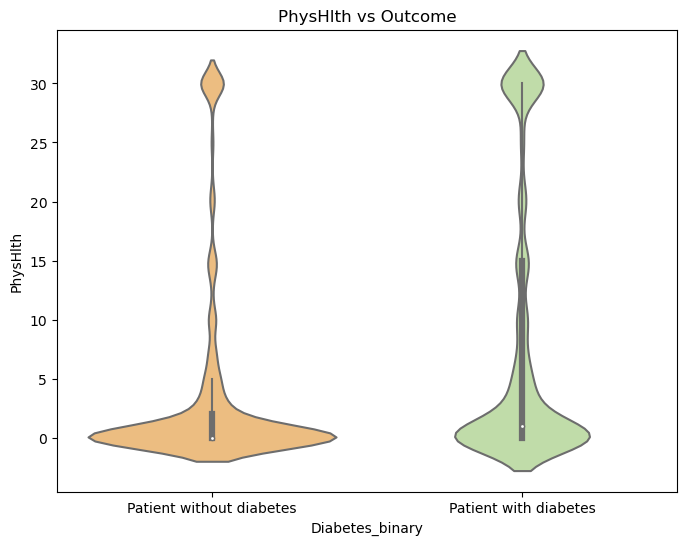

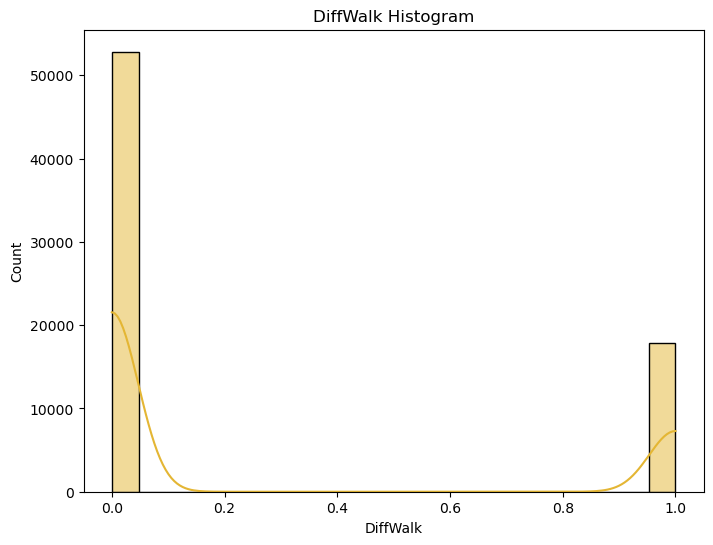

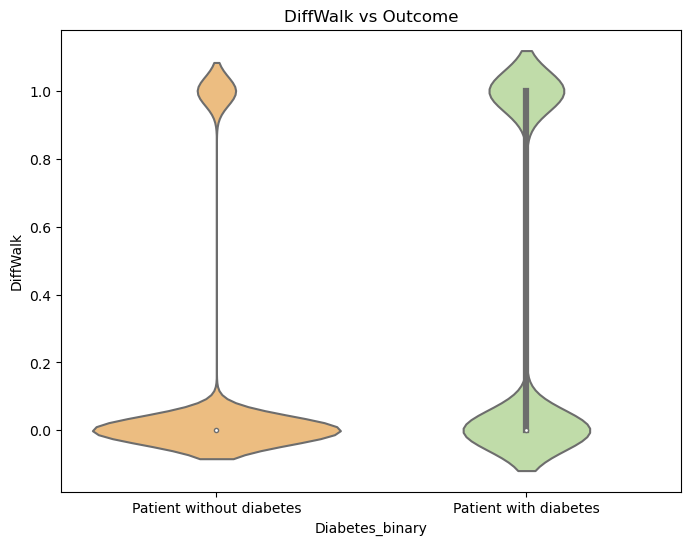

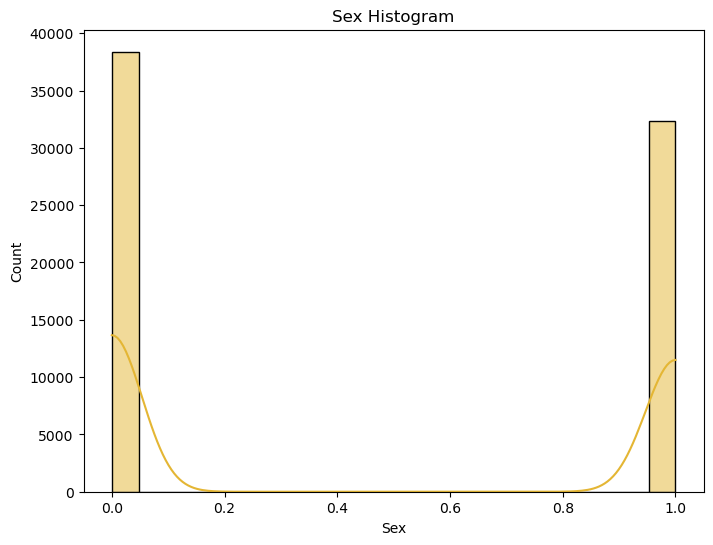

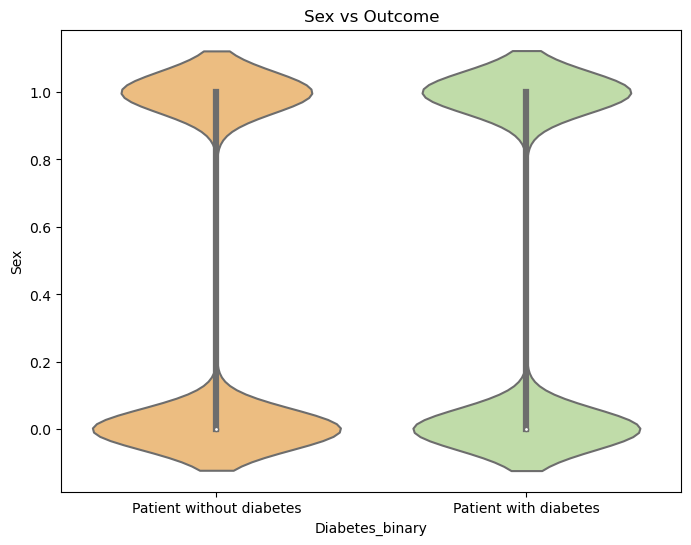

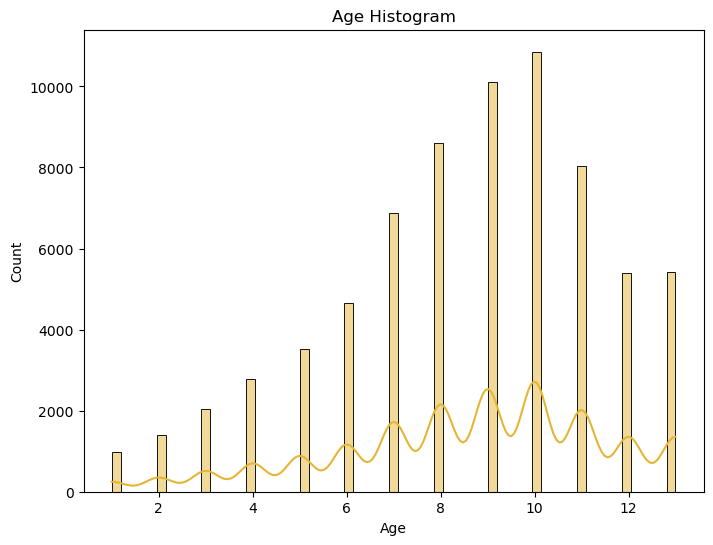

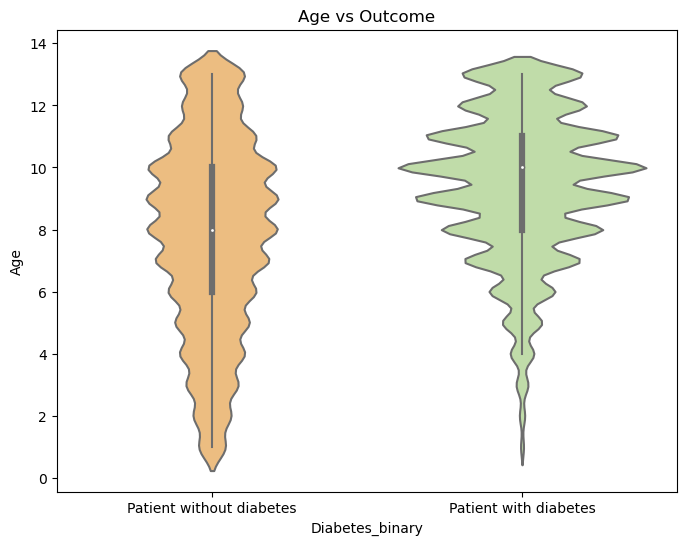

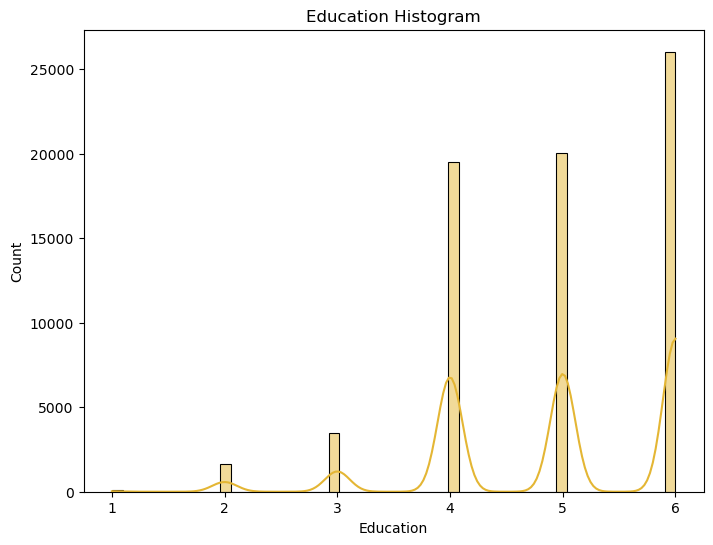

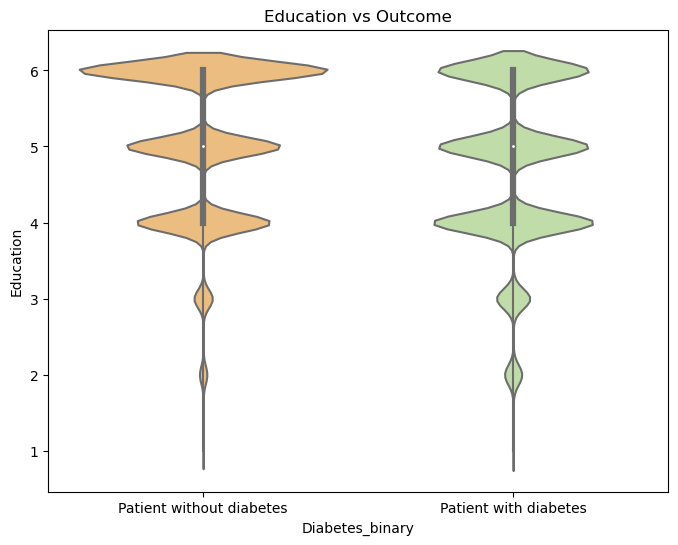

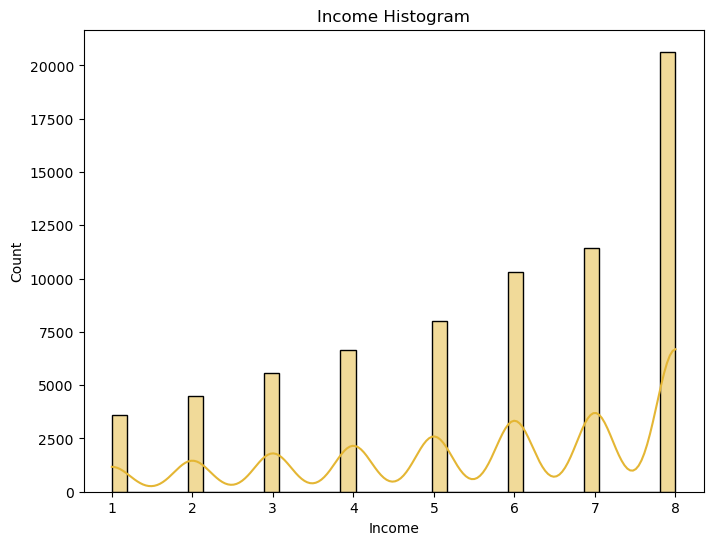

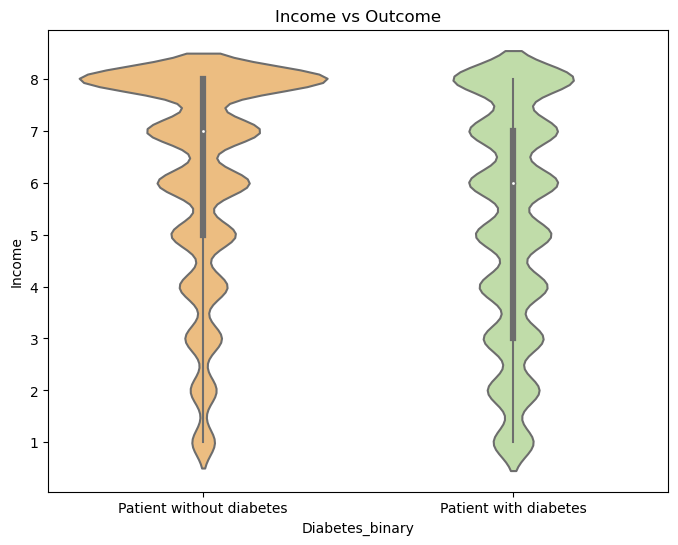

In [7]:
# Plotting each column (feature) in histogram and violin plot
%matplotlib inline

for column in data.columns:
    if column == "Diabetes_binary":
        continue
    plot_function(data, column, "histogram")
    plot_function(data, column, "violinplot")

### Outcomes:

#### From histograms:
- almost all patients had a cholesterol check within past five years
- almost all patients didn't have a stroke



#### From violin plots:
- patients with diabetes have High Blood Pressure
- patients with diabetes have High Cholesterol
- almost all patients with diabetes have had their cholesterol checked in the past 5 years
- heart disease or attack is most likely to be correalted to diabetes
- strokes and smoking are NOT directly correlated with diabetes?
- fruits, veggies and physical activity are NOT directly correlated with diabetes
- the poorer the general health, more likely to have diabetes
- the poorer the physical health, more likely to have diabetes
- the more difficulties of walking the patient has, the more likely to have diabetes
- there are more men with diabetes than men without diabetes, but there are less man with diabetes than women with diabetes
- Most diabetic pacients are in the age rage of 65-70 years
- The higher the income, the higher the chances to NOT have diabetes

## Correlation Matrix 

A correlation matrix heatmap visually represents the correlation between variables using colors. It helps identify relationships, detect multicollinearity, select variables, recognize patterns, and spot outliers in a dataset. The color scheme indicates the strength and direction of correlations, simplifying insights into complex relationships.

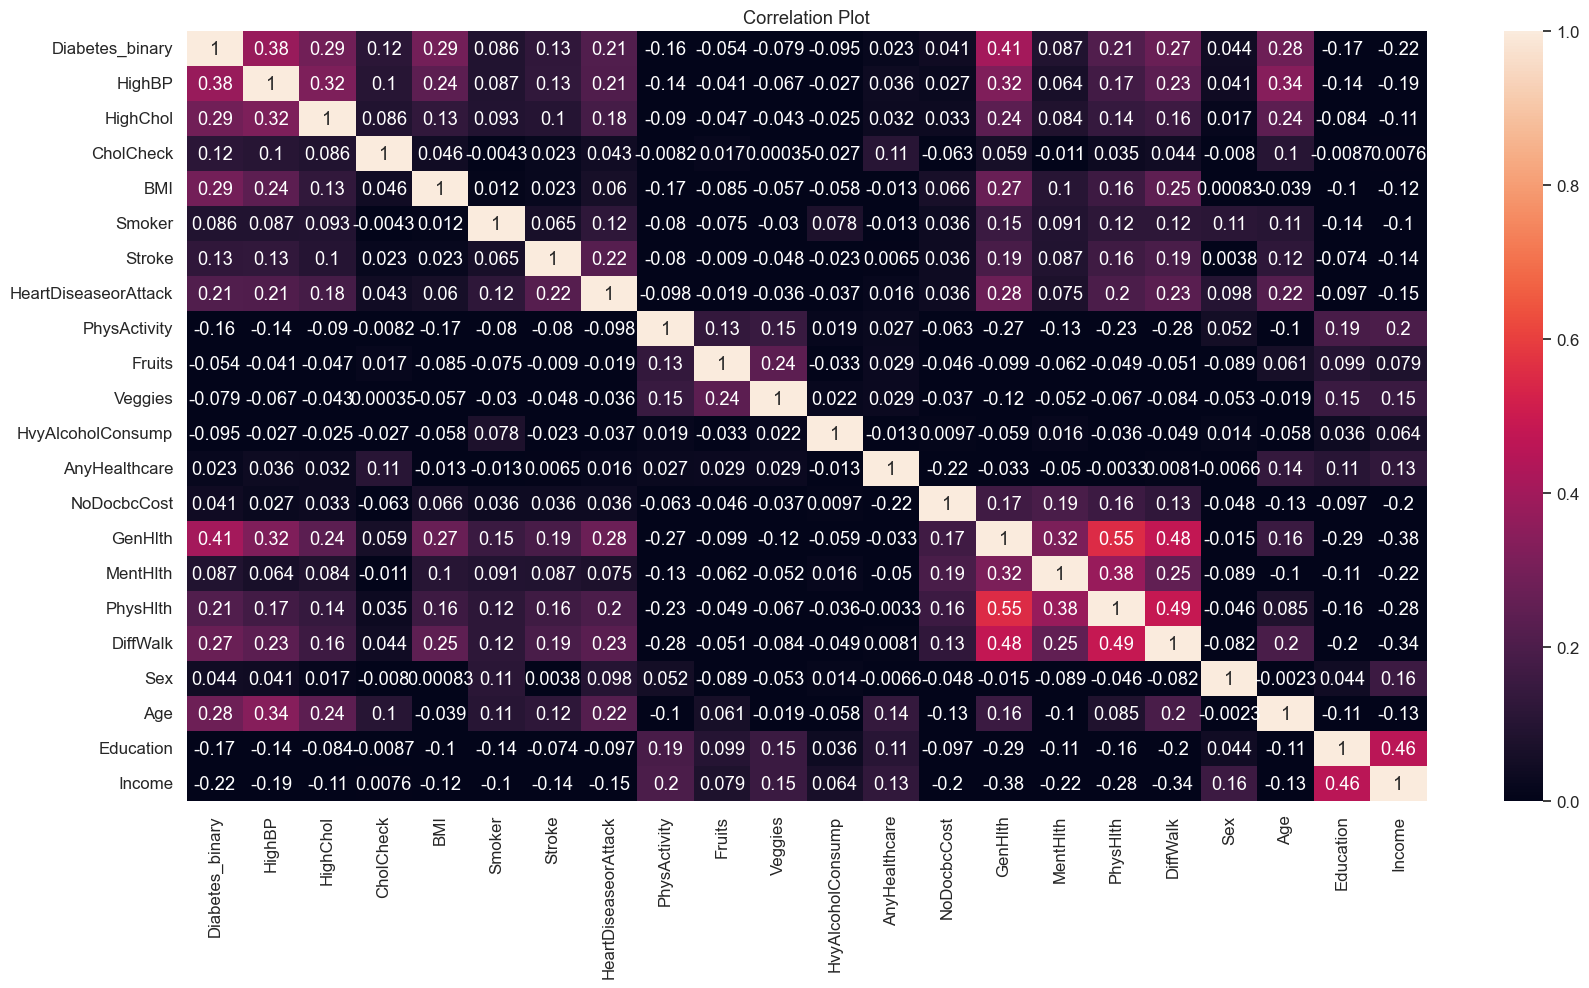

In [8]:
# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.1)
heatmap = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Plot')
plt.show()

### Outcomes:
#### High correlations:

- Diabetes - General Health = 0.41
- Diabetes - High Blood Pressure = 0.38
- Diabetes - High Cholesterol = 0.29
- Diabetes - BMI = 0.29
- Diabetes - Age = 0.28
- Diabetes - DiffWalk = 0.27


- General Health - Physical Health = 0.55
- General Health - DiffWalk = 0.48

- Income - Education = 0.46

## Train Catboost Classifier

CatBoost is a powerful gradient boosting algorithm specifically designed to handle categorical features seamlessly. It stands out by eliminating the need for extensive preprocessing of categorical data, making it a robust choice for machine learning tasks. CatBoost incorporates strategies to efficiently handle categorical variables, optimizing training speed and model performance. This algorithm is particularly useful in scenarios where feature importance interpretation and categorical data management are critical aspects of the machine learning process.

In [9]:
# splitting the train and the test data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

std_scaler = StandardScaler()
X = data.drop(columns='Diabetes_binary', axis=1)
y = data['Diabetes_binary']

X = std_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [10]:
# training the CatBoost model
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

Learning rate set to 0.059221
0:	learn: 0.6715471	total: 65.1ms	remaining: 1m 5s
1:	learn: 0.6526744	total: 70ms	remaining: 34.9s
2:	learn: 0.6358866	total: 74.2ms	remaining: 24.7s
3:	learn: 0.6213808	total: 78.2ms	remaining: 19.5s
4:	learn: 0.6095147	total: 81.9ms	remaining: 16.3s
5:	learn: 0.5983624	total: 86.3ms	remaining: 14.3s
6:	learn: 0.5887018	total: 91.8ms	remaining: 13s
7:	learn: 0.5810022	total: 97ms	remaining: 12s
8:	learn: 0.5737337	total: 101ms	remaining: 11.2s
9:	learn: 0.5672525	total: 106ms	remaining: 10.5s
10:	learn: 0.5613849	total: 110ms	remaining: 9.85s
11:	learn: 0.5561836	total: 113ms	remaining: 9.33s
12:	learn: 0.5516810	total: 117ms	remaining: 8.88s
13:	learn: 0.5476968	total: 121ms	remaining: 8.54s
14:	learn: 0.5441303	total: 125ms	remaining: 8.22s
15:	learn: 0.5406573	total: 130ms	remaining: 7.99s
16:	learn: 0.5376678	total: 135ms	remaining: 7.79s
17:	learn: 0.5348593	total: 139ms	remaining: 7.6s
18:	learn: 0.5325041	total: 143ms	remaining: 7.39s
19:	learn: 0

## Feature Importance

Feature importance in machine learning refers to the assessment of each input variable's contribution to the predictive performance of a model. It helps us identify which features or variables have a more significant impact on the model's outcomes. It enhances our ability to discern the most influential factors, providing valuable information for decision-making, model refinement, and a deeper understanding of the variables affecting the outcomes.

In [11]:
# selecting the features without the target feature
features = data.drop(columns='Diabetes_binary', axis=1).columns
features = [str(x) for x in features]
features

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

### Here we are using the feature importance from our trained model, and then we are mapping the values in the figure below.

Text(0.5, 1.0, 'Feature Importance')

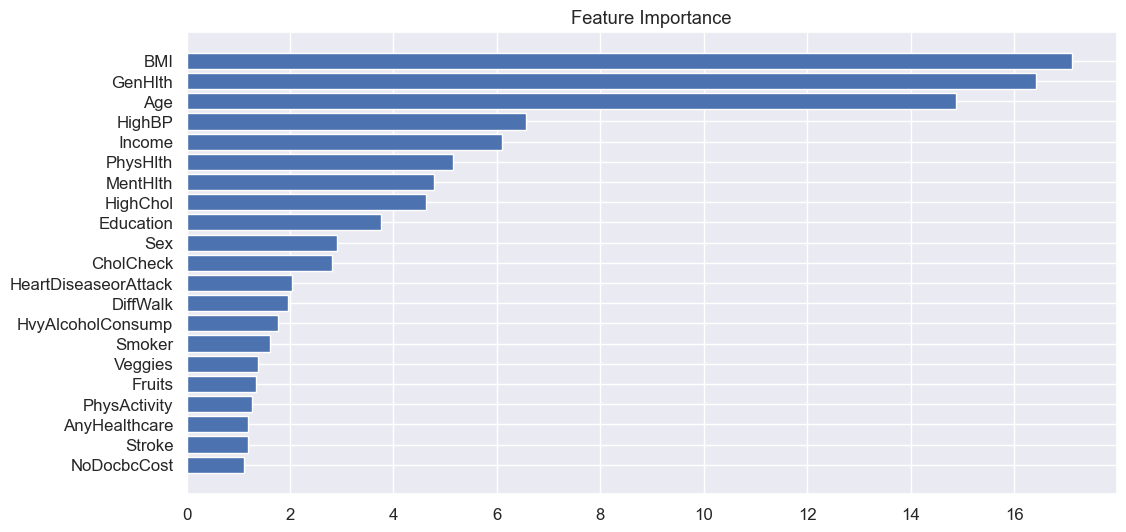

In [12]:
feature_importance = cbc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('Feature Importance')

array([12,  5, 11,  7,  8,  9,  4, 10, 16,  6,  2, 17, 19,  1, 14, 15, 20,
        0, 18, 13,  3])

### Outcomes:
### Top 5 most important features in predicting diabetes risk:

1. General Health
2. BMI
3. Age
4. High Blood Pressure
5. Income


## SHAP Values

SHAP values as a tool helps us understand and interpret the impact of different variables on our model's predictions. It assigns a numerical value to each feature, indicating its contribution to the model's output. The impact comes from a vector v with contributions of each feature to the prediction for every input object and the expected value of the model prediction for the object (average prediction given no knowledge about the object).

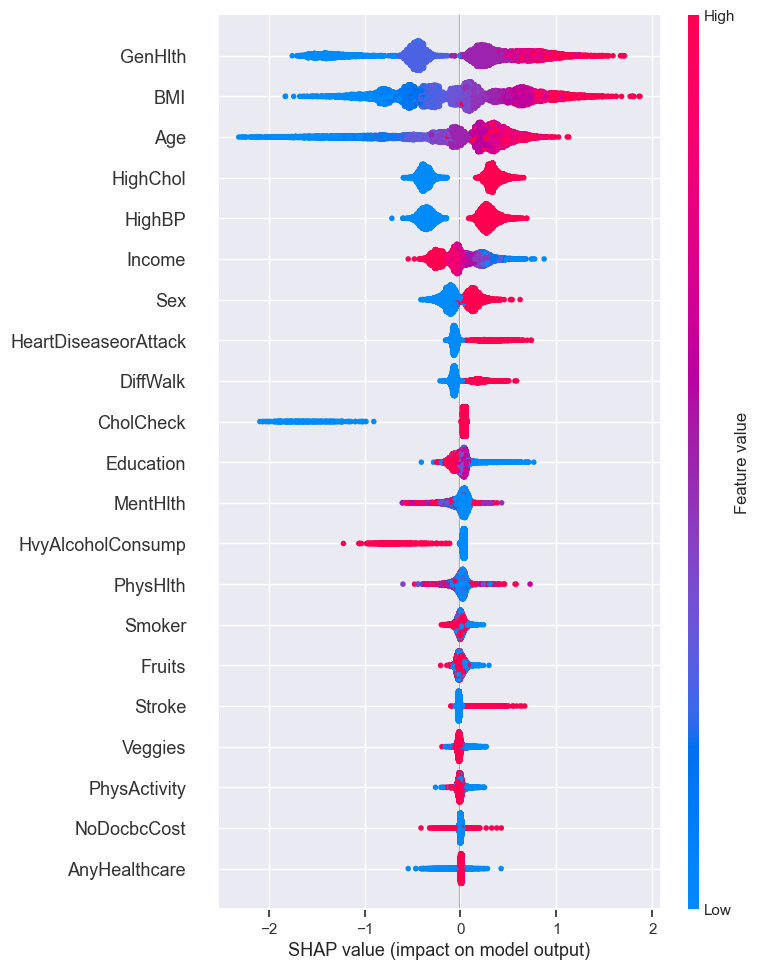

In [13]:
# plotting SHAP values based on our test values
import shap

shap_explainer = shap.TreeExplainer(cbc)
shap_values = shap_explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1], show=False, feature_names=features)

Besides High Colesterol, we already know that the first 5 values are directly correlated to the risk of diabetes risk, as we saw in feature importance. 

We can also see that Income plays a big part in the risk, but inversely proportional, not like the others in direct proportion.